## Практическое занятие 10. Анализ данных аукциона

<div class="alert alert-block alert-success">
</b> ФИО, группа: </b> Безгребельная Алла, УСБО-01-23
</div>

Наборы данных auction.csv содержит информацию об аукционе eBay по продаже наручных часов Cartier, карманных компьютеров Palm Pilot M515, игровых консолей Xbox.

* auctionid: уникальный идентификатор аукциона
* bid: промежуточная ставка, сделанная участником аукциона
* bidtime: время в днях, в течение которого товар была выставлен на продажу с начала аукциона
* bidder: имя пользователя участника аукциона на eBay
* bidderrate: рейтинг участника аукциона в отзывах на eBay
* openbid: начальная ставка, установленная продавцом
* price: цена закрытия, по которой был продан предмет (эквивалентная второй по величине ставке + дополнительная надбавка)
* item: предмет аукциона
* auction_type: тип аукциона


### Часть 1. Предварительный анализ

<div class="alert alert-block alert-warning">
<b> 1.  Импортируйте необходимые библиотеки и установите датасет для анализа: </b>
</div>

In [610]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('auction.csv')
df

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
0,1638893549,175.00,2.230949,schadenfreud,0.0,99.00,177.50,Cartier wristwatch,3 day auction
1,1638893549,100.00,2.600116,chuik,0.0,99.00,177.50,Cartier wristwatch,3 day auction
2,1638893549,120.00,2.600810,kiwisstuff,2.0,99.00,177.50,Cartier wristwatch,3 day auction
3,1638893549,150.00,2.601076,kiwisstuff,2.0,99.00,177.50,Cartier wristwatch,3 day auction
4,1638893549,177.50,2.909826,eli.flint@flightsafety.co,4.0,99.00,177.50,Cartier wristwatch,3 day auction
...,...,...,...,...,...,...,...,...,...
10676,8214889177,61.00,6.359155,714ark,15.0,0.01,90.01,Xbox game console,7 day auction
10677,8214889177,76.00,6.359294,rjdorman,1.0,0.01,90.01,Xbox game console,7 day auction
10678,8214889177,90.00,6.428738,baylorjeep,3.0,0.01,90.01,Xbox game console,7 day auction
10679,8214889177,88.00,6.760081,jasonjasonparis,18.0,0.01,90.01,Xbox game console,7 day auction


<div class="alert alert-block alert-warning">
<b> 2. Проведите предварительный анализ данных - установите, есть ли в данных пропуски, удалите их или замените, оцените размер датасета и постройте графики распределения переменных (опирайтесь на прошлые кейсы) </b>
</div>

In [612]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10681 entries, 0 to 10680
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   auctionid     10681 non-null  int64  
 1   bid           10681 non-null  float64
 2   bidtime       10681 non-null  float64
 3   bidder        10665 non-null  object 
 4   bidderrate    10670 non-null  float64
 5   openbid       10681 non-null  float64
 6   price         10681 non-null  float64
 7   item          10681 non-null  object 
 8   auction_type  10681 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 751.1+ KB


In [614]:
df = df.drop(np.where(df['bidder'].isna())[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10665 entries, 0 to 10680
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   auctionid     10665 non-null  int64  
 1   bid           10665 non-null  float64
 2   bidtime       10665 non-null  float64
 3   bidder        10665 non-null  object 
 4   bidderrate    10654 non-null  float64
 5   openbid       10665 non-null  float64
 6   price         10665 non-null  float64
 7   item          10665 non-null  object 
 8   auction_type  10665 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 833.2+ KB


In [616]:
df[df.bidderrate.isna()]

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
8999,8212140993,135.00,6.402141,mac_ranch,NaN,9.99,306.0,Xbox game console,7 day auction
9000,8212140993,145.00,6.402384,mac_ranch,NaN,9.99,306.0,Xbox game console,7 day auction
9139,8212190120,22.22,4.537535,Private,NaN,12.99,28.0,Xbox game console,7 day auction
9140,8212190120,15.00,4.769734,Private,NaN,12.99,28.0,Xbox game console,7 day auction
9141,8212190120,22.00,4.769815,Private,NaN,12.99,28.0,Xbox game console,7 day auction
9142,8212190120,22.72,6.738773,Private,NaN,12.99,28.0,Xbox game console,7 day auction
9143,8212190120,24.00,6.753611,Private,NaN,12.99,28.0,Xbox game console,7 day auction
9144,8212190120,25.00,6.857685,Private,NaN,12.99,28.0,Xbox game console,7 day auction
9145,8212190120,25.00,6.943333,Private,NaN,12.99,28.0,Xbox game console,7 day auction
9146,8212190120,28.00,6.989757,Private,NaN,12.99,28.0,Xbox game console,7 day auction


In [618]:
df['bidderrate'] = df['bidderrate'].fillna(df.bidderrate.mean())

In [620]:
df.shape

(10665, 9)

In [622]:
df.head()

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
0,1638893549,175.0,2.230949,schadenfreud,0.0,99.0,177.5,Cartier wristwatch,3 day auction
1,1638893549,100.0,2.600116,chuik,0.0,99.0,177.5,Cartier wristwatch,3 day auction
2,1638893549,120.0,2.600810,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
3,1638893549,150.0,2.601076,kiwisstuff,2.0,99.0,177.5,Cartier wristwatch,3 day auction
4,1638893549,177.5,2.909826,eli.flint@flightsafety.co,4.0,99.0,177.5,Cartier wristwatch,3 day auction


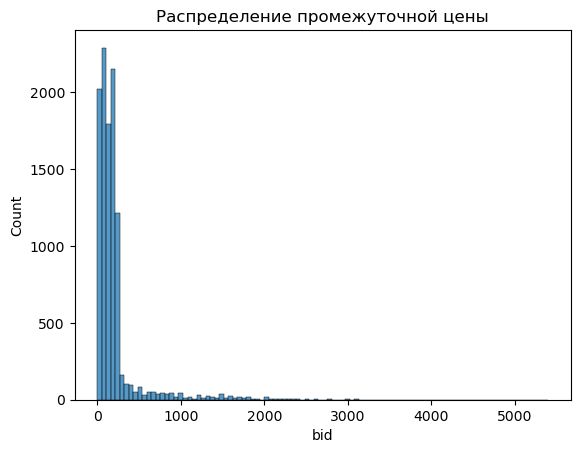

In [624]:
sns.histplot(data = df, x = 'bid', bins = 100)
plt.title("Распределение промежуточной цены")
plt.show()

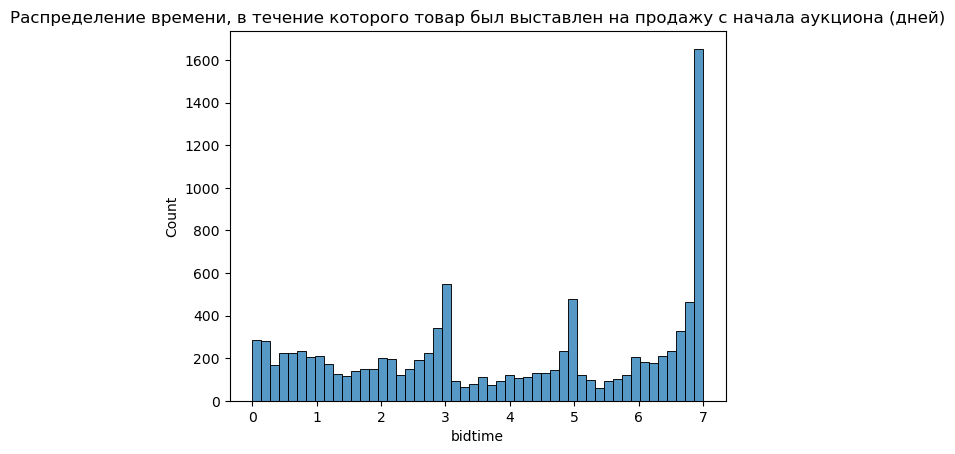

In [625]:
sns.histplot(data = df, x = 'bidtime', bins = 50)
plt.title("Распределение времени, в течение которого товар был выставлен на продажу с начала аукциона (дней)")
plt.show()

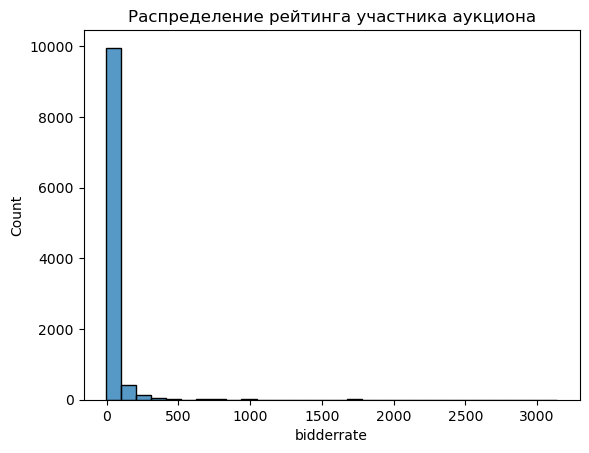

In [627]:
sns.histplot(data = df, x = 'bidderrate', bins = 30)
plt.title("Распределение рейтинга участника аукциона")
plt.show()

In [629]:
df.bidder.unique().shape

(3387,)

In [630]:
df.bidderrate.describe()

count    10665.000000
mean        31.982166
std        120.616642
min         -4.000000
25%          1.000000
50%          5.000000
75%         21.000000
max       3140.000000
Name: bidderrate, dtype: float64

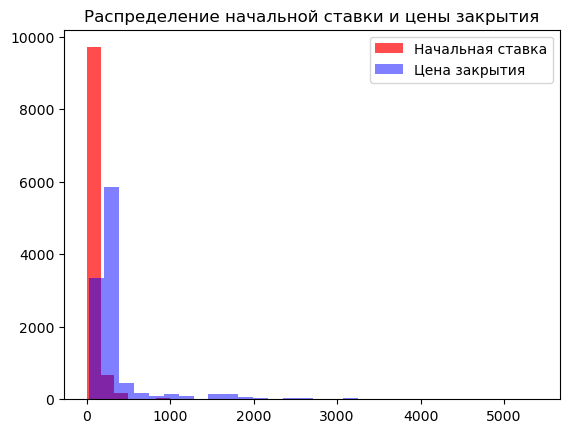

In [634]:
plt.hist(data = df, x = 'openbid', bins = 30, color = 'red', alpha = 0.7, label = 'Начальная ставка')
plt.hist(data = df, x = 'price', bins = 30, color = 'blue', alpha = 0.5, label = 'Цена закрытия')
plt.title('Распределение начальной ставки и цены закрытия')
plt.legend()
plt.show()

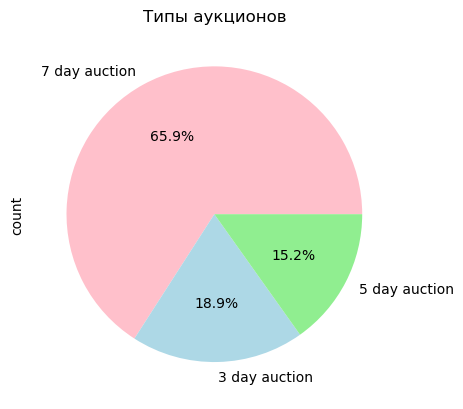

In [642]:
df['auction_type'].value_counts().plot.pie(autopct='%1.1f%%', colors = ['pink', 'lightblue', 'lightgreen'])
plt.title('Типы аукционов')
plt.show()

### Часть 2. Анализ данных

<div class="alert alert-block alert-warning">
<b> 3. Выведите описательные статистики  столбцов. Сделайте выводы о варьируемуести переменных.
</b>
</div>

In [646]:
df.describe()

,auctionid,bid,bidtime,bidderrate,openbid,price
count,1.066500e+04,10665.000000,10665.000000,10665.000000,10665.000000,10665.000000
mean,4.130030e+09,207.767673,3.977561,31.982166,52.321473,335.372205
std,2.486767e+09,323.244672,2.353645,120.616642,168.568326,433.807722
min,1.638844e+09,0.010000,0.000567,-4.000000,0.010000,26.000000
25%,3.015329e+09,72.000000,1.948880,1.000000,1.000000,187.520000
50%,3.020455e+09,140.000000,4.137820,5.000000,4.990000,228.490000
75%,8.212136e+09,210.000000,6.445650,21.000000,50.000000,255.000000
max,8.215611e+09,5400.000000,6.999990,3140.000000,5000.000000,5400.000000


У всех показателей кроме bidtime медианное значение больше среднего (положительная асимметрия), у bidtime -- отрицательная асимметрия.

<div class="alert alert-block alert-warning">
<b> 4. Проанализируйте товары, участвующие в аукционе, ответив на следующие вопросы (выполнив следующие задания): 
    
* Какие типы товаров и за какую конечную стоимость покупают люди с меньшим/большим рейтингом?
* Составьте сводную таблицу, отображающую среднюю конечную стоимость различных типов товаров, купленных в разных типах аукционов.

Сделайте краткие выводы по результатам анализа
    
</b>
</div>

In [650]:
first_quantile = df['bidderrate'].quantile(0.25)
third_quantile = df['bidderrate'].quantile(0.75)

# Товары, которые покупают люди с меньшим рейтингом (25% общего числа покупателей, нижний квартиль)
df[df.bidderrate <= first_quantile][['item', 'price']].groupby('item').agg(['count', 'mean']).reset_index()

item price             
                       count         mean
0   Cartier wristwatch   661  1031.951815
1  Palm Pilot M515 PDA  1708   232.613285
2    Xbox game console  1012   149.279447

In [652]:
# Товары, которые покупают люди с большим рейтингом (25% общего числа покупателей, третий квартиль)
df[df.bidderrate >= third_quantile][['item', 'price']].groupby('item').agg(['count', 'mean']).reset_index()

item price            
                       count        mean
0   Cartier wristwatch   567  774.224586
1  Palm Pilot M515 PDA  1467  231.576489
2    Xbox game console   659  136.624810

In [654]:
pd.pivot_table(df, values = 'price', index = 'item', columns = 'auction_type', aggfunc = 'mean')

auction_type,3 day auction,5 day auction,7 day auction
item,,,
Cartier wristwatch,678.779800,960.790620,961.307819
Palm Pilot M515 PDA,227.452928,230.115270,232.527364
Xbox game console,122.774810,149.259364,149.256257


In [656]:
round(100-149.256257/149.259364*100, 3)

0.002

Конечная стоимость товаров увеличивается пропорционально числу дней работы аукциона, 
исключением является "Xbox game console", на 7-дневном аукционе по сравнению с 5-дневным цена уменьшилась на 0.002%. 

<div class="alert alert-block alert-warning">
<b> 5. Проанализируйте, как время, в течение которого товар был выставлен на продажу (bidtime), влияет на цену закрытия. Постройте график зависимости цены от времени (scatterplot).   </b>
</div>

<Axes: xlabel='price', ylabel='bidtime'>

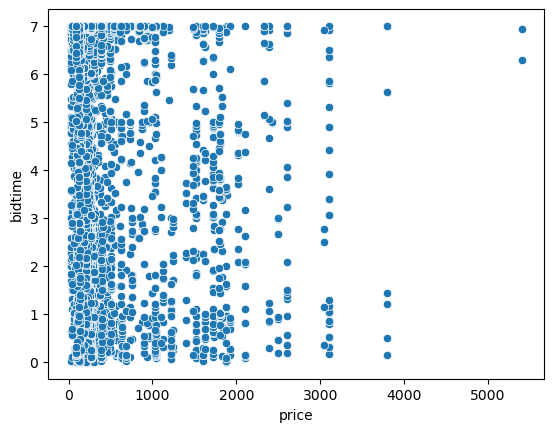

In [660]:
sns.scatterplot(data=df, x = 'price', y = 'bidtime')

In [662]:
df[['price', 'bidtime']].corr()

,price,bidtime
price,1.000000,-0.089972
bidtime,-0.089972,1.000000


Между показателями очень слабая обратная корреляция.

<div class="alert alert-block alert-warning">
<b> 6. Посчитайте количество ставок (bid) на каждый лот и определите, какие предметы вызывают наибольший интерес у участников аукциона.   </b>
</div>

In [666]:
pd.pivot_table(df, index = 'auctionid', columns = 'item', values = 'bid', aggfunc = 'count', fill_value = 0, margins=True)

item,Cartier wristwatch,Palm Pilot M515 PDA,Xbox game console,All
auctionid,,,,
1638843936,7,0,0,7
1638844284,2,0,0,2
1638844464,16,0,0,16
1638844729,11,0,0,11
1638893549,5,0,0,5
...,...,...,...,...
8215571039,0,0,20,20
8215582227,0,0,16,16
8215605488,0,0,11,11


Самый популярный предмет на аукционе Palm Pilot M515 PDA.

<div class="alert alert-block alert-warning">
<b> 7. Напишите программу, которая присвоет каждому участнику аукциона его описание (1,2,3; где 1 - участники с высоким рейтингом и ставками, 2 - участники со средним рейтингом и ставками, 3 - участники с низким рейтингом и ставками) в отдельном столбце. 
</b>
</div>

In [750]:
first_quantile_rate = df['bidderrate'].quantile(0.25)
third_quantile_rate = df['bidderrate'].quantile(0.75)
first_quantile_bid = df['bid'].quantile(0.25)
third_quantile_bid = df['bid'].quantile(0.75)


def group_apply(row): 
    rating = row['bidderrate']
    bidd = row['bid']

    if rating >= third_quantile_rate and bidd >= third_quantile_bid:
        return 1
    elif first_quantile_rate<=rating<third_quantile_rate  and first_quantile_bid<=bidd<third_quantile_bid:
        return 2
    else:
        return 3


df['description'] = df[['bidderrate', 'bid']].apply(group_apply, axis=1)
df

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type,description
0,1638893549,175.00,2.230949,schadenfreud,0.0,99.00,177.50,Cartier wristwatch,3 day auction,3
1,1638893549,100.00,2.600116,chuik,0.0,99.00,177.50,Cartier wristwatch,3 day auction,3
2,1638893549,120.00,2.600810,kiwisstuff,2.0,99.00,177.50,Cartier wristwatch,3 day auction,2
3,1638893549,150.00,2.601076,kiwisstuff,2.0,99.00,177.50,Cartier wristwatch,3 day auction,2
4,1638893549,177.50,2.909826,eli.flint@flightsafety.co,4.0,99.00,177.50,Cartier wristwatch,3 day auction,2
...,...,...,...,...,...,...,...,...,...,...
10676,8214889177,61.00,6.359155,714ark,15.0,0.01,90.01,Xbox game console,7 day auction,3
10677,8214889177,76.00,6.359294,rjdorman,1.0,0.01,90.01,Xbox game console,7 day auction,2
10678,8214889177,90.00,6.428738,baylorjeep,3.0,0.01,90.01,Xbox game console,7 day auction,2
10679,8214889177,88.00,6.760081,jasonjasonparis,18.0,0.01,90.01,Xbox game console,7 day auction,2


In [762]:
unique_rows = df[['bidder', 'description']].drop_duplicates()
bidders_with_2_groups = unique_rows.groupby('bidder').count().sort_values('description', ascending = False).head(407).reset_index()

bidders_list = bidders_with_2_groups['bidder'].tolist()
mask = unique_rows['bidder'].isin(bidders_list)
result = unique_rows[mask]
result.groupby('description').count()

,bidder
description,
1,73
2,334
3,407


<div class="alert alert-block alert-warning">
<b> 8. Проанализируйте категории участников аукциона по всем показателям, имеющимся в датасете. Составьте краткие выводы
    
</b>
</div>

In [513]:
df[['openbid','bid', 'price', 'bidtime', 'bidderrate']].corr()

,openbid,bid,price,bidtime,bidderrate
openbid,1.000000,0.609919,0.495245,0.055081,-0.002077
bid,0.609919,1.000000,0.858284,0.132905,-0.016783
price,0.495245,0.858284,1.000000,-0.089972,-0.016001
bidtime,0.055081,0.132905,-0.089972,1.000000,-0.031373
bidderrate,-0.002077,-0.016783,-0.016001,-0.031373,1.000000


1. Промежуточная ставка в наибольшей степени влияет на остальные показатели.
2. Начальная ставка также оказывает влияние на цену закрытия, но в меньшей степени, чем промежуточная ставка.
3. Рейтинг участника  практически не связан с другими переменными.
4. Время ставки имеет очень слабую связь с другими переменными.

<div class="alert alert-block alert-warning">
<b> 9. Проанализируйте начальную ставку, промежуточную ставку и цену закрытия по типам аукционов. Сделайте выводы об их различиях построив соответствующие графики
    
</b>
</div>

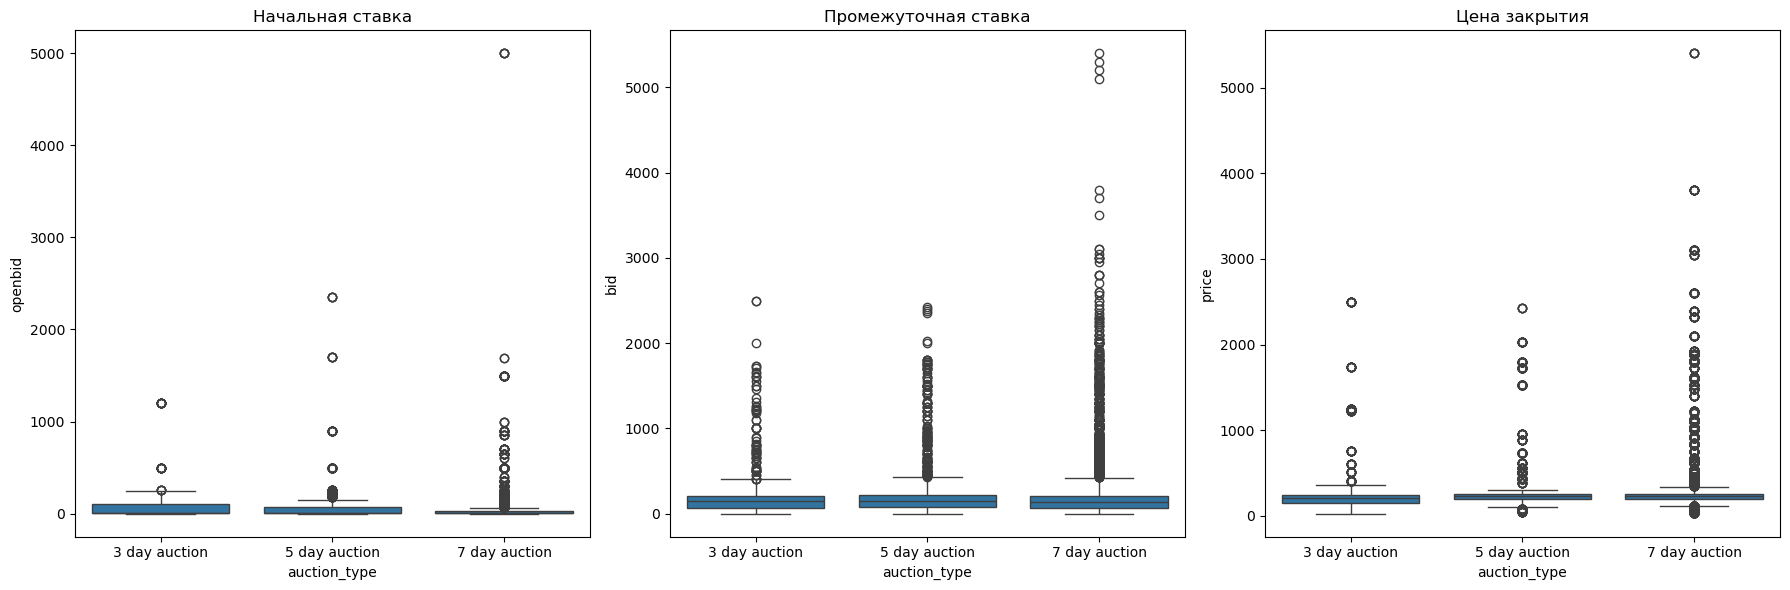

In [493]:
mean_prices = df.groupby('auction_type')[['openbid', 'bid', 'price']].mean()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.boxplot(x='auction_type', y='openbid', data=df, ax=axes[0])
axes[0].set_title('Начальная ставка')
sns.boxplot(x='auction_type', y='bid', data=df, ax=axes[1])
axes[1].set_title('Промежуточная ставка')
sns.boxplot(x='auction_type', y='price', data=df, ax=axes[2])
axes[2].set_title('Цена закрытия')

plt.tight_layout()
plt.show()

In [495]:
df[['openbid', 'bid', 'price', 'auction_type']].groupby('auction_type').mean()

,openbid,bid,price
auction_type,,,
3 day auction,61.621367,166.285225,254.666756
5 day auction,70.503908,230.266865,370.878027
7 day auction,45.467371,214.507162,350.385918


Наименьшая средняя цена на семидневном аукционе -- 45,5;. наибольшая на пятидневном -- 70,5. Максимальная средняя промежуточная цена 
на пятидневном аукционе -- 230,3, наименьшая на трехдневном -- 166,3. Наибольшая средняя цена закрытия сделки на пятидневном аукционе -- 379,9,
наименьшая на трехдневном -- 254,7. 
Наибольшие значения средней цены открытия, промежуточная ставка и цены закрытия на пятидневных аукционах, наименьшие значения на трехдневном аукционе.

<div class="alert alert-block alert-warning">
<b> 10. Составьте комплексные выводы по анализу в целом по датасету, учитывая промежуточные результаты
    
</b>
</div>

__Выводы:__

In [553]:
df.bidder.unique().shape

(3387,)

<div class="alert alert-light">
В датасете содержится 10665 записей об аукционе eBay по продаже наручных часов Cartier, карманных компьютеров Palm Pilot M515, игровых консолей Xbox.
В торгах принимало участие 3387 уникальных пользователей, половина из которых имеет рейтинг ниже 5.0, однако также наблюдаются участники с высоким рейтингом (максимальное значение равно 3140.0). 

    65.9% аукционов были семидневными, 15.2% — пятидневными, 18.9% — трехдневными. 

 Самым популярным предметом на аукционе является Palm Pilot M515. Люди с меньшим рейтингом (25% участников аукциона, имеющих рейтинг ниже 1.0) чаще покупают карманные компьютеры Palm Pilot M515 (1708 сделок), в среднем за 232.6 ден. ед. Люди с большим рейтингом (больше 21.0) также чаще покупают Palm Pilot M515 (1467 сделок), в среднем за 231.7 ден. ед.

Конечная стоимость товаров увеличивается пропорционально числу дней работы аукциона, 
исключением является "Xbox game console", на 7-дневном аукционе по сравнению с 5-дневным цена уменьшилась на 0.002%. 

Мы распределили участников аукциона на три группы: участники с высоким рейтингом и ставками, участники со средним рейтингом и ставками, участники с низким рейтингом и ставками. Самой многочисленной группой является 3-я (2477), самая маленькая по численности группа первая (299), во второй 1018 участников. Одному участнику может присваиваться несколько номеров группы, т.к. принадлежность к группе рассчитывается для каждой ставки. Всего 407 участников с двумя группами: 73 участника принадлежат к 1 и 3 группе, 334 участника принадлежат ко 2 и 3.

1. Промежуточная ставка в наибольшей степени влияет на остальные показатели.
2. Начальная ставка также оказывает влияние на цену закрытия, но в меньшей степени, чем промежуточная ставка.
3. Рейтинг участника  практически не связан с другими переменными.
4. Время ставки имеет очень слабую связь с другими переменными.  Наименьшая средняя цена на семидневном аукционе -- 45,5;. наибольшая на пятидневном -- 70,5. Максимальная средняя промежуточная цена 
на пятидневном аукционе -- 230,3, наименьшая на трехдневном -- 166,3. Наибольшая средняя цена закрытия сделки на пятидневном аукционе -- 379,9,
наименьшая на трехдневном -- 254,7. 
Наибольшие значения средней цены открытия, промежуточная ставка и цены закрытия на пятидневных аукционах, наименьшие значения на трехдневном аукционе.

</div>